# DEPENDENCIES

In [2]:
# Load libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime as dt
import re

import plotly.express as px

import pandas_datareader.data as web
from pandas_datareader import data as pdr

import yfinance as yf

(
    yf
    .pdr_override()
)

import warnings
warnings.filterwarnings("ignore")

# Setting baseline seed
np.random.seed(241001)

# Set print options.

np.set_printoptions(precision = 3)

plt.style.use("ggplot") # Grammar of Graphics Theme

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [3]:
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging (Bootstrap aggregation)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

In [4]:
# for data split (be careful if the regime that we choose is during market shift)
from sklearn.model_selection import train_test_split

# for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

In [5]:
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

In [6]:
from pandas.plotting import scatter_matrix

# for Pre-processing (Feature Engineering)
from sklearn.preprocessing import StandardScaler

# assumption checks for Time-Series
from statsmodels.graphics.tsaplots import plot_acf

# IMPORT DATA

> Left with 1321 stocks instead of 3000 stocks 

In [9]:
ff = pd.read_csv('FF_daily_data.csv')

In [10]:
ff = ff.rename(columns = {'Unnamed: 0':'Date'})

In [11]:
ff = ff.set_index('Date')

In [12]:
ff = ff.dropna()
ff = ff[['Mkt-RF','SMB','HML']]
ff.index = pd.to_datetime(ff.index)
ff

,Mkt-RF,SMB,HML
Date,,,
1999-01-04,-0.19,0.14,0.41
1999-01-05,1.10,-0.73,-0.09
1999-01-06,2.10,-0.60,-0.60
1999-01-07,-0.07,0.49,-0.29
1999-01-08,0.45,0.06,0.28
...,...,...,...
2024-08-26,-0.34,0.10,0.16
2024-08-27,0.06,-0.86,0.02
2024-08-28,-0.67,-0.55,1.14


In [13]:
stock_ticker_y = ["^RUA"]
stock_data_y = yf.download(stock_ticker_y)

[*********************100%%**********************]  1 of 1 completed


In [14]:
stock_data_y = stock_data_y[['Adj Close']]
stock_data_y = stock_data_y.rename(columns ={'Adj Close':'RUA'})

In [15]:
stock_data_y.isna().sum()

RUA    0
dtype: int64

In [16]:
stock_data_y = stock_data_y.loc['1999':'2023']

In [17]:
stock_data_y['RUA_return'] = np.exp(np.log(stock_data_y['RUA']/stock_data_y['RUA'].shift(1)))
stock_data_y

,RUA,RUA_return
Date,,
1999-01-04,663.159973,NaN
1999-01-05,670.849976,1.011596
1999-01-06,684.820007,1.020824
1999-01-07,683.919983,0.998686
1999-01-08,687.109985,1.004664
...,...,...
2023-12-22,2741.199951,1.002238
2023-12-26,2754.719971,1.004932
2023-12-27,2759.219971,1.001634


In [18]:
stock_data_clean = pd.read_csv('data_cleaned_FINALNOW.csv')

In [19]:
stock_data_clean = stock_data_clean.set_index('Date')

In [20]:
list_of_col = list(stock_data_clean.columns)
list_of_col

['AA',
 'AAON',
 'AAPL',
 'ABCB',
 'ABM',
 'ABT',
 'ACGL',
 'ACHC',
 'ACIW',
 'ADBE',
 'ADC',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEIS',
 'AEO',
 'AEP',
 'AES',
 'AFG',
 'AFL',
 'AGCO',
 'AIG',
 'AIN',
 'AIT',
 'AJG',
 'ALB',
 'ALE',
 'ALK',
 'ALKS',
 'ALL',
 'AMAT',
 'AMD',
 'AME',
 'AMED',
 'AMG',
 'AMGN',
 'AMKR',
 'AMT',
 'AMZN',
 'AN',
 'ANF',
 'ANSS',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'ARCB',
 'ARE',
 'ARW',
 'ARWR',
 'ASB',
 'ASGN',
 'ASH',
 'ATGE',
 'ATO',
 'ATR',
 'AUB',
 'AVA',
 'AVB',
 'AVT',
 'AVY',
 'AWR',
 'AXP',
 'AZO',
 'AZPN',
 'AZTA',
 'BA',
 'BAC',
 'BALL',
 'BAX',
 'BBWI',
 'BBY',
 'BC',
 'BCO',
 'BCPC',
 'BDC',
 'BDX',
 'BEN',
 'BIIB',
 'BIO',
 'BK',
 'BKH',
 'BKR',
 'BMI',
 'BMY',
 'BOH',
 'BOKF',
 'BPOP',
 'BRO',
 'BSX',
 'BWA',
 'BXMT',
 'BXP',
 'BYD',
 'C',
 'CACC',
 'CACI',
 'CADE',
 'CAG',
 'CAH',
 'CALM',
 'CAR',
 'CASY',
 'CAT',
 'CATY',
 'CB',
 'CBSH',
 'CBT',
 'CBU',
 'CBZ',
 'CCI',
 'CCK',
 'CCL',
 'CDNS',
 'CDP',
 'CFR',
 'CGNX',
 'CHD',
 

In [21]:
return_data_clean= pd.DataFrame()

In [22]:
for i in list_of_col:
    return_data_clean[i+'_return']= np.exp(np.log(stock_data_clean[i] / stock_data_clean[i].shift(1)))

In [23]:
return_data_clean

,AA_return,AAON_return,AAPL_return,ABCB_return,ABM_return,ABT_return,ACGL_return,ACHC_return,ACIW_return,ADBE_return,...,WTS_return,WWD_return,WY_return,X_return,XEL_return,XOM_return,XRAY_return,YUM_return,ZBRA_return,ZION_return
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-05,1.020339,1.012659,1.049999,1.000000,0.975792,1.001282,0.961565,1.041667,0.952880,0.978723,...,1.003690,0.988506,1.008772,1.045333,1.002278,0.991395,1.009756,1.019481,1.017021,0.996891
1999-01-06,1.039867,1.000000,0.963925,1.019803,0.967557,0.992317,1.000000,0.960000,1.065934,0.964195,...,0.992647,0.982558,1.008696,1.119898,1.004545,1.039930,1.009662,1.015286,1.002092,1.001040
1999-01-07,0.987220,0.987500,1.077844,0.990291,1.015779,0.987098,0.994186,1.062500,1.000000,1.021220,...,0.929630,1.017751,1.003695,0.981777,0.995475,0.998330,0.997608,0.994981,1.022964,0.992731
1999-01-08,1.101942,1.000000,1.000000,1.014706,1.015534,0.996077,0.994152,0.862745,1.023196,1.014286,...,1.000000,0.970930,1.087117,1.048724,0.993182,0.994147,0.988010,1.002522,1.110204,1.002092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,1.054653,1.014090,0.994453,1.015075,1.006617,1.005070,0.995685,1.015256,1.007311,0.997684,...,1.017591,1.004461,1.007329,0.996055,1.008614,1.001769,1.000853,1.000154,1.015454,1.008712
2023-12-26,1.002961,1.010080,0.997159,1.020183,0.998028,1.001834,0.995531,1.011945,1.008248,0.999182,...,1.009619,1.002146,1.007858,1.007922,1.003061,1.002257,1.009086,1.002000,1.022605,1.020000
2023-12-27,1.027753,1.000809,1.000518,1.002986,0.995829,1.005127,1.000408,0.998604,1.001309,0.996356,...,0.996698,1.004653,1.003754,1.005378,0.996922,0.995301,1.002532,1.004453,1.001053,0.991756


In [24]:
return_data_clean.isna().sum()

AA_return      1
AAON_return    1
AAPL_return    1
ABCB_return    1
ABM_return     1
              ..
XOM_return     1
XRAY_return    1
YUM_return     1
ZBRA_return    1
ZION_return    1
Length: 682, dtype: int64

> Left with 682 stocks

In [26]:
return_period = 5

# FORECAST VARIABLE (Y)

In [28]:
Y =\
    (np
     .log(stock_data_y.loc[:, ("RUA_return")]
         )
     .diff(return_period)
     .shift(-return_period)
    )

Y.name =\
    ('RUA'
     
     +
     "_pred")

Y

Date
1999-01-04         NaN
1999-01-05   -0.029811
1999-01-06   -0.025350
1999-01-07   -0.016526
1999-01-08    0.018970
                ...   
2023-12-22         NaN
2023-12-26         NaN
2023-12-27         NaN
2023-12-28         NaN
2023-12-29         NaN
Name: RUA_pred, Length: 6260, dtype: float64

# INDEPENDENT VARIABLES (X)

x1 = 3000 stocks => after cleaned, left with 682 stocks

x2 = lag 5 , 15, 30, 60, days

x3 = fama french 3 factors

x4 = dummy variable GFC and covid

x5 = moving average 5, 15, 30, 60 days

x6 = constant

In [31]:
X1 =\
    (np.
     log(return_data_clean)
    ).diff(return_period)

X1.index = pd.to_datetime(X1.index)

X1

,AA_return,AAON_return,AAPL_return,ABCB_return,ABM_return,ABT_return,ACGL_return,ACHC_return,ACIW_return,ADBE_return,...,WTS_return,WWD_return,WY_return,X_return,XEL_return,XOM_return,XRAY_return,YUM_return,ZBRA_return,ZION_return
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.013863,0.015678,-0.002833,0.022602,0.029208,0.017193,0.012558,0.043246,0.004589,-0.002387,...,0.026238,0.007321,0.025139,-0.015975,0.024526,0.008485,-0.000021,0.019173,0.022637,0.049569
2023-12-26,0.021782,0.015247,0.005695,0.034076,0.000425,-0.005318,-0.021093,0.007904,0.007878,-0.025233,...,0.007768,0.001407,0.001548,-0.223911,-0.009370,-0.005151,0.018102,-0.012128,0.035392,0.038219
2023-12-27,-0.033018,-0.021834,-0.004828,-0.017229,-0.022140,0.001788,-0.002000,-0.011775,-0.019661,-0.012805,...,-0.015613,-0.000940,-0.022725,0.030066,0.000613,-0.017807,-0.016657,0.006207,-0.009170,-0.028746


In [32]:
X2 =\
    (
    pd
    .concat([np
             .log(stock_data_y.loc[ : , "RUA_return"]
                                
                 )
             .diff(i) for i in [return_period, 
                                return_period * 3, 
                                return_period * 6, 
                                return_period * 12]
            ],
           axis = 1
           )
    .dropna()
)

X2.columns = ["RUA_DT", "RUA_3DT", "RUA_6DT", "RUA_12DT"]

In [33]:
X2

,RUA_DT,RUA_3DT,RUA_6DT,RUA_12DT
Date,,,,
1999-04-01,-0.011694,-0.002313,-0.005472,-0.006606
1999-04-05,0.024261,0.022243,0.017093,-0.001340
1999-04-06,-0.022856,-0.011691,-0.027311,-0.001283
1999-04-07,0.011455,0.005698,0.004808,0.000066
1999-04-08,0.021170,0.017979,0.025139,0.018420
...,...,...,...,...
2023-12-22,0.003217,-0.006229,0.011121,-0.004109
2023-12-26,0.000916,0.008798,-0.009990,0.007549
2023-12-27,-0.005525,0.003722,0.002348,0.003307


In [34]:
X3 = ff.diff(return_period)

X3

,Mkt-RF,SMB,HML
Date,,,
1999-01-04,NaN,NaN,NaN
1999-01-05,NaN,NaN,NaN
1999-01-06,NaN,NaN,NaN
1999-01-07,NaN,NaN,NaN
1999-01-08,NaN,NaN,NaN
...,...,...,...
2024-08-26,-1.32,-0.38,0.45
2024-08-27,0.38,-0.21,0.70
2024-08-28,-1.19,-1.56,1.77


In [35]:
dummydf = stock_data_clean.copy()

In [36]:
# Set GFC to 1 for the specified date range and 0 otherwise
dummydf['GFC'] = 0  # Initialize to 0
dummydf.loc[(return_data_clean.index >= '2007-08-09') & (return_data_clean.index <= '2008-12-31'), 'GFC'] = 1

# Set COVID to 1 for the specified date range and 0 otherwise
dummydf['COVID'] = 0  # Initialize to 0
dummydf.loc[(return_data_clean.index >= '2020-03-11') & (return_data_clean.index <= '2021-12-31'), 'COVID'] = 1


In [37]:
dummydf = dummydf[['GFC','COVID']]

In [38]:
dummydf[dummydf['COVID']!=0]

,GFC,COVID
Date,,
2020-03-11,0,1
2020-03-12,0,1
2020-03-13,0,1
2020-03-16,0,1
2020-03-17,0,1
...,...,...
2021-12-27,0,1
2021-12-28,0,1
2021-12-29,0,1


In [39]:
X4 = dummydf

In [40]:
X4.index = pd.to_datetime(X4.index)

In [41]:
X4.value_counts()

GFC  COVID
0    0        5478
     1         458
1    0         353
Name: count, dtype: int64

In [42]:
X5 =\
    (
    pd
    .concat([np
             .log(stock_data_y.loc[ : , "RUA_return"]
                                
                 )
             .rolling(i).mean() for i in [return_period, 
                                return_period * 3, 
                                return_period * 6, 
                                return_period * 12]
            ],
           axis = 1
           )
    .dropna()
)

X5.columns = ["RUA_MA_5", "RUA_MA_15", "RUA_MA_30", "RUA_MA_60"]

In [43]:
invar_stock_return = pd.read_csv('tensor_data2.csv')
invar_stock_return

,datetime,SPY,^RUA,^RUI,^RUT
0,1999-01-06,0.164379,-0.319585,1.640210,0.908791
1,1999-01-07,-0.357131,-1.097350,0.267309,1.041293
2,1999-01-08,-1.226321,-1.137739,1.090739,-1.135078
3,1999-01-11,1.402942,-0.855704,0.861622,-0.044484
4,1999-01-12,0.828560,0.706092,-1.332193,0.161845
...,...,...,...,...,...
6282,2023-12-22,0.673913,-0.967395,0.772616,0.214336
6283,2023-12-26,-0.471583,1.002384,0.505993,0.274006
6284,2023-12-27,0.155475,0.563706,-1.106871,2.245309
6285,2023-12-28,0.820056,0.573130,-1.508734,0.204533


In [44]:
invar_stock_return['datetime'] = pd.to_datetime(invar_stock_return['datetime'])

In [45]:
invar_stock_return = invar_stock_return.set_index('datetime')

In [46]:
invar_stock_return

,SPY,^RUA,^RUI,^RUT
datetime,,,,
1999-01-06,0.164379,-0.319585,1.640210,0.908791
1999-01-07,-0.357131,-1.097350,0.267309,1.041293
1999-01-08,-1.226321,-1.137739,1.090739,-1.135078
1999-01-11,1.402942,-0.855704,0.861622,-0.044484
1999-01-12,0.828560,0.706092,-1.332193,0.161845
...,...,...,...,...
2023-12-22,0.673913,-0.967395,0.772616,0.214336
2023-12-26,-0.471583,1.002384,0.505993,0.274006
2023-12-27,0.155475,0.563706,-1.106871,2.245309


In [47]:
X6 = invar_stock_return
X6

,SPY,^RUA,^RUI,^RUT
datetime,,,,
1999-01-06,0.164379,-0.319585,1.640210,0.908791
1999-01-07,-0.357131,-1.097350,0.267309,1.041293
1999-01-08,-1.226321,-1.137739,1.090739,-1.135078
1999-01-11,1.402942,-0.855704,0.861622,-0.044484
1999-01-12,0.828560,0.706092,-1.332193,0.161845
...,...,...,...,...
2023-12-22,0.673913,-0.967395,0.772616,0.214336
2023-12-26,-0.471583,1.002384,0.505993,0.274006
2023-12-27,0.155475,0.563706,-1.106871,2.245309


In [48]:
import pandas as pd

# Create the DataFrame with a constant column
constant_df = pd.DataFrame()
constant_df['constant'] = 1

# Generate a daily date range from 1999-01-01 to 2023-12-31
date_range = pd.date_range(start='1999-01-01', end='2023-12-31', freq='D')

# Set the date range as the index for the DataFrame
constant_df = constant_df.reindex(date_range)
constant_df.index.name = 'Date'

# Fill NaN values in 'constant' column with 1
constant_df['constant'].fillna(1, inplace=True)

In [49]:
constant_df

,constant
Date,
1999-01-01,1.0
1999-01-02,1.0
1999-01-03,1.0
1999-01-04,1.0
1999-01-05,1.0
...,...
2023-12-27,1.0
2023-12-28,1.0
2023-12-29,1.0


In [50]:
X=\
(
    pd
    .concat([X2, X3, X5, X6, constant_df],
            axis = 1)
)

X.index = pd.to_datetime(X.index)

In [51]:
Y = Y.to_frame()

In [52]:
Y

,RUA_pred
Date,
1999-01-04,NaN
1999-01-05,-0.029811
1999-01-06,-0.025350
1999-01-07,-0.016526
1999-01-08,0.018970
...,...
2023-12-22,NaN
2023-12-26,NaN
2023-12-27,NaN


In [53]:
duplicate_indices = Y.index.duplicated()
duplicate_indices.sum()


0

In [54]:
X = X[~X.index.duplicated()]

In [55]:
data =\
(
    pd
    .concat([Y, X],
        axis = 1)
    .dropna()
    .iloc[ : :return_period, :]
)

In [56]:
data.to_csv('data_combined_y_x.csv')

In [57]:
Y = data.loc[ : ,'RUA_pred']

In [58]:
Y

1999-04-01   -0.000843
1999-04-09   -0.005301
1999-04-16    0.000544
1999-04-23   -0.004009
1999-04-30    0.014098
                ...   
2023-11-20   -0.006593
2023-11-28   -0.002747
2023-12-05    0.006116
2023-12-12    0.003131
2023-12-19   -0.005525
Name: RUA_pred, Length: 1239, dtype: float64

In [59]:
X = data.loc[ : , X.columns]

X

,RUA_DT,RUA_3DT,RUA_6DT,RUA_12DT,Mkt-RF,SMB,HML,RUA_MA_5,RUA_MA_15,RUA_MA_30,RUA_MA_60,SPY,^RUA,^RUI,^RUT,constant
1999-04-01,-0.011694,-0.002313,-0.005472,-0.006606,-1.24,-0.68,1.30,0.000897,-0.000240,0.001372,0.000425,0.681224,-0.690924,-2.189553,-0.055062,1.0
1999-04-09,-0.000843,-0.008417,0.011365,0.022362,-0.11,1.48,-0.81,0.007535,0.001481,0.002408,0.001062,-1.386626,-1.681676,-1.411401,-0.057112,1.0
1999-04-16,-0.005301,-0.017837,-0.015026,-0.003539,-0.66,-0.42,1.43,-0.002895,0.001846,0.001869,0.000641,0.286080,-0.957964,0.062582,0.927289,1.0
1999-04-23,0.000544,-0.005600,-0.007913,0.007129,0.34,-0.12,-0.96,0.005694,0.003444,0.001602,0.001338,-0.750733,1.041735,-1.233775,-0.721876,1.0
1999-04-30,-0.004009,-0.008766,-0.017183,-0.012915,-0.58,-0.01,-0.33,-0.002544,0.000085,0.000783,0.000768,-0.026481,0.960785,-0.264856,-0.633735,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-20,0.007966,-0.004150,0.000915,0.000755,0.78,-0.15,-0.02,0.006597,0.005892,0.001516,0.000464,-1.814544,0.568606,0.295483,-0.063833,1.0
2023-11-28,-0.006593,0.000718,-0.010648,-0.002248,-0.67,-0.29,0.33,0.000295,0.002849,0.001314,0.000041,0.570508,0.046086,0.270816,0.639652,1.0
2023-12-05,-0.002747,-0.001374,0.000428,-0.008570,-0.27,-0.53,-0.90,0.001335,0.002742,0.002806,0.000288,0.295645,-0.611232,0.043400,1.396553,1.0
2023-12-12,0.006116,-0.003224,-0.007374,0.004073,0.55,0.39,-0.04,0.003297,0.001642,0.003767,0.000703,-0.021634,1.032848,-1.123488,0.562940,1.0


# Data Split 80:20

In [61]:
validation_size = 0.20

train_size = int(len(X) * (1 - validation_size))

X_train, X_test = (X[0  : train_size] , X[train_size:len(X)])

Y_train, Y_test = (Y[0  : train_size] , Y[train_size:len(X)])

In [62]:
Y

1999-04-01   -0.000843
1999-04-09   -0.005301
1999-04-16    0.000544
1999-04-23   -0.004009
1999-04-30    0.014098
                ...   
2023-11-20   -0.006593
2023-11-28   -0.002747
2023-12-05    0.006116
2023-12-12    0.003131
2023-12-19   -0.005525
Name: RUA_pred, Length: 1239, dtype: float64

In [63]:
Y_test

2018-12-11    0.000783
2018-12-18    0.007050
2018-12-28    0.001439
2019-01-07   -0.014369
2019-01-14    0.007371
                ...   
2023-11-20   -0.006593
2023-11-28   -0.002747
2023-12-05    0.006116
2023-12-12    0.003131
2023-12-19   -0.005525
Name: RUA_pred, Length: 248, dtype: float64

# Feature Extraction

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler().fit(X_train)
rescaledDataset = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns, index = X_train.index)

In [67]:
# summarize transformed data
X_train.dropna(how = "any", inplace = True)
rescaledDataset.dropna(how = "any", inplace = True)
rescaledDataset.head(2)

,RUA_DT,RUA_3DT,RUA_6DT,RUA_12DT,Mkt-RF,SMB,HML,RUA_MA_5,RUA_MA_15,RUA_MA_30,RUA_MA_60,SPY,^RUA,^RUI,^RUT,constant
1999-04-01,-0.737547,-0.148153,-0.328459,-0.415406,-0.785732,-0.825865,1.448745,0.145061,-0.153376,0.638395,0.185677,0.792859,-0.792990,-2.628235,-0.080990,0.0
1999-04-09,-0.053894,-0.534604,0.686096,1.414118,-0.070447,1.801759,-0.902132,1.479757,0.488661,1.191016,0.670486,-1.703727,-2.015711,-1.686660,-0.083606,0.0


In [68]:
scaler2 = StandardScaler().fit(X_test)
rescaledDataset2 = pd.DataFrame(scaler2.fit_transform(X_test),columns = X_test.columns, index = X_test.index)

In [69]:
# summarize transformed data
X_test.dropna(how = "any", inplace = True)
rescaledDataset2.dropna(how = "any", inplace = True)
rescaledDataset2.head(2)

,RUA_DT,RUA_3DT,RUA_6DT,RUA_12DT,Mkt-RF,SMB,HML,RUA_MA_5,RUA_MA_15,RUA_MA_30,RUA_MA_60,SPY,^RUA,^RUI,^RUT,constant
2018-12-11,-0.668528,-0.163301,0.950378,-0.102038,-0.671954,-0.012859,0.204303,-2.064716,-0.874044,-0.306285,-1.459317,1.279258,0.497279,-0.398457,-1.749618,0.0
2018-12-18,0.045792,-0.877076,0.334904,0.046902,0.010350,0.076657,-0.135403,-1.309410,-1.166137,-1.202240,-1.938173,2.591154,-0.963073,-2.149100,-1.466058,0.0


In [70]:
from matplotlib.ticker import MaxNLocator
from sklearn.decomposition import TruncatedSVD


Variance preserved by first 5 components == 39.99%


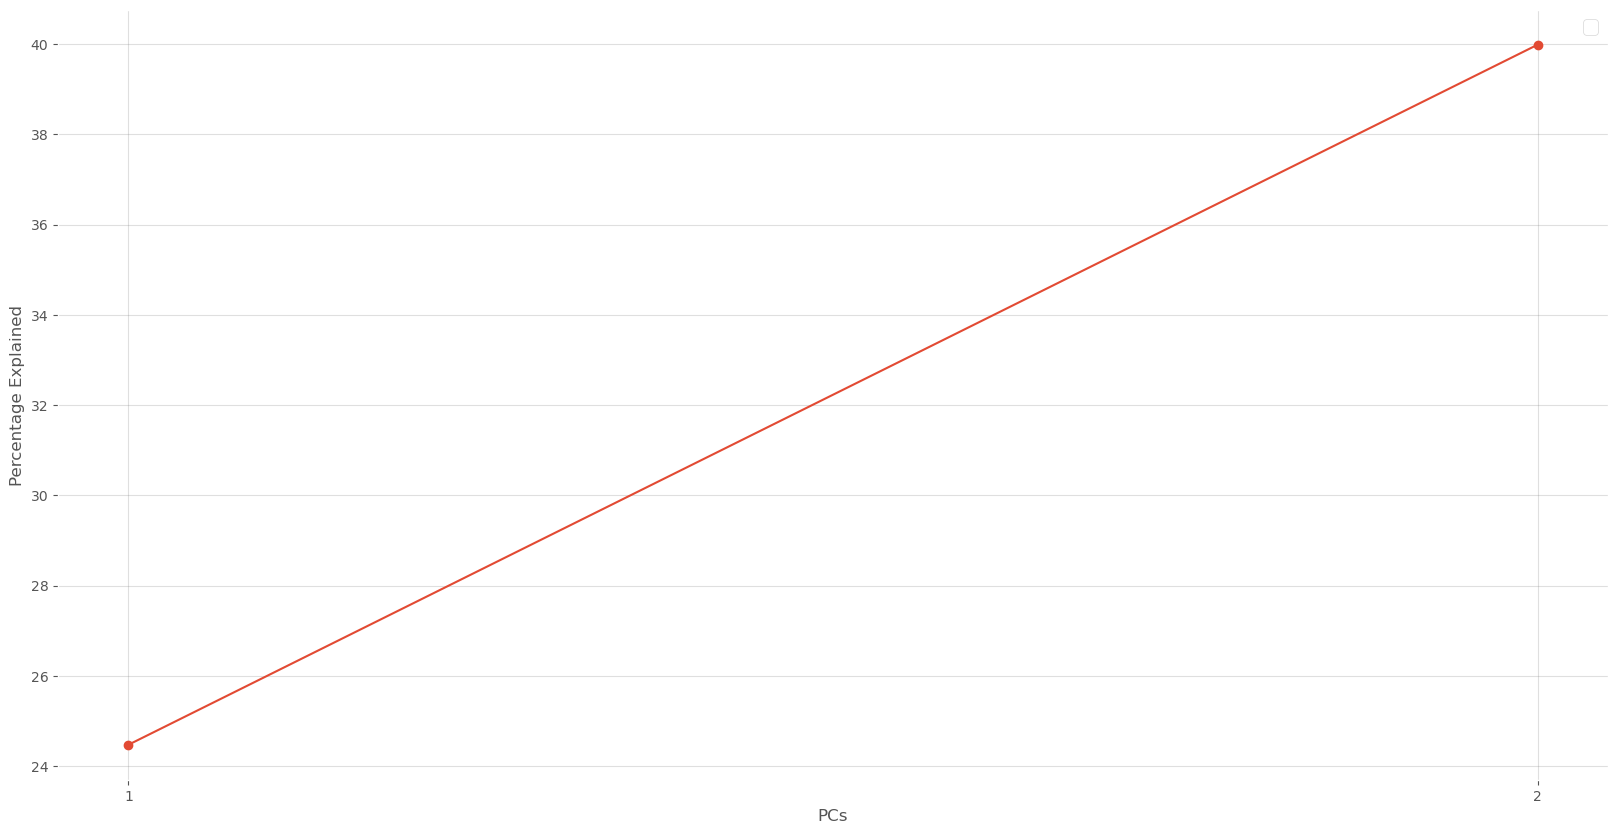

In [71]:
ncomps = 2

svd = TruncatedSVD(n_components=ncomps)

svd_fit = svd.fit(rescaledDataset)

plt_data = pd.DataFrame(svd_fit.explained_variance_ratio_.cumsum()*100)

plt_data.index = np.arange(1, len(plt_data) + 1)

Y_pred = svd.fit_transform(rescaledDataset)

ax = plt_data.plot(kind="line", figsize=(20, 10), style = "o-"
                  )
ax.xaxis.set_major_locator(MaxNLocator(integer = True)
                          )

ax.set_xlabel("PCs")
ax.set_ylabel("Percentage Explained")
ax.legend("")

print("Variance preserved by first 5 components == {:.2%}".format(svd_fit.explained_variance_ratio_.cumsum()[-1]
                                                                 )
     )

In [72]:
dfsvd = pd.DataFrame(Y_pred, columns=["pc{}".format(c) for c in range(ncomps)], 
                     index = rescaledDataset.index)
print(dfsvd.shape)
dfsvd.tail()

(991, 2)


,pc0,pc1
2018-11-02,-0.327012,-1.252615
2018-11-09,-1.399676,-0.049346
2018-11-16,0.980493,-1.793493
2018-11-26,0.748500,-2.216008
2018-12-03,1.377088,-0.095783


In [73]:
X_train = dfsvd

Variance preserved by first 5 components == 38.69%


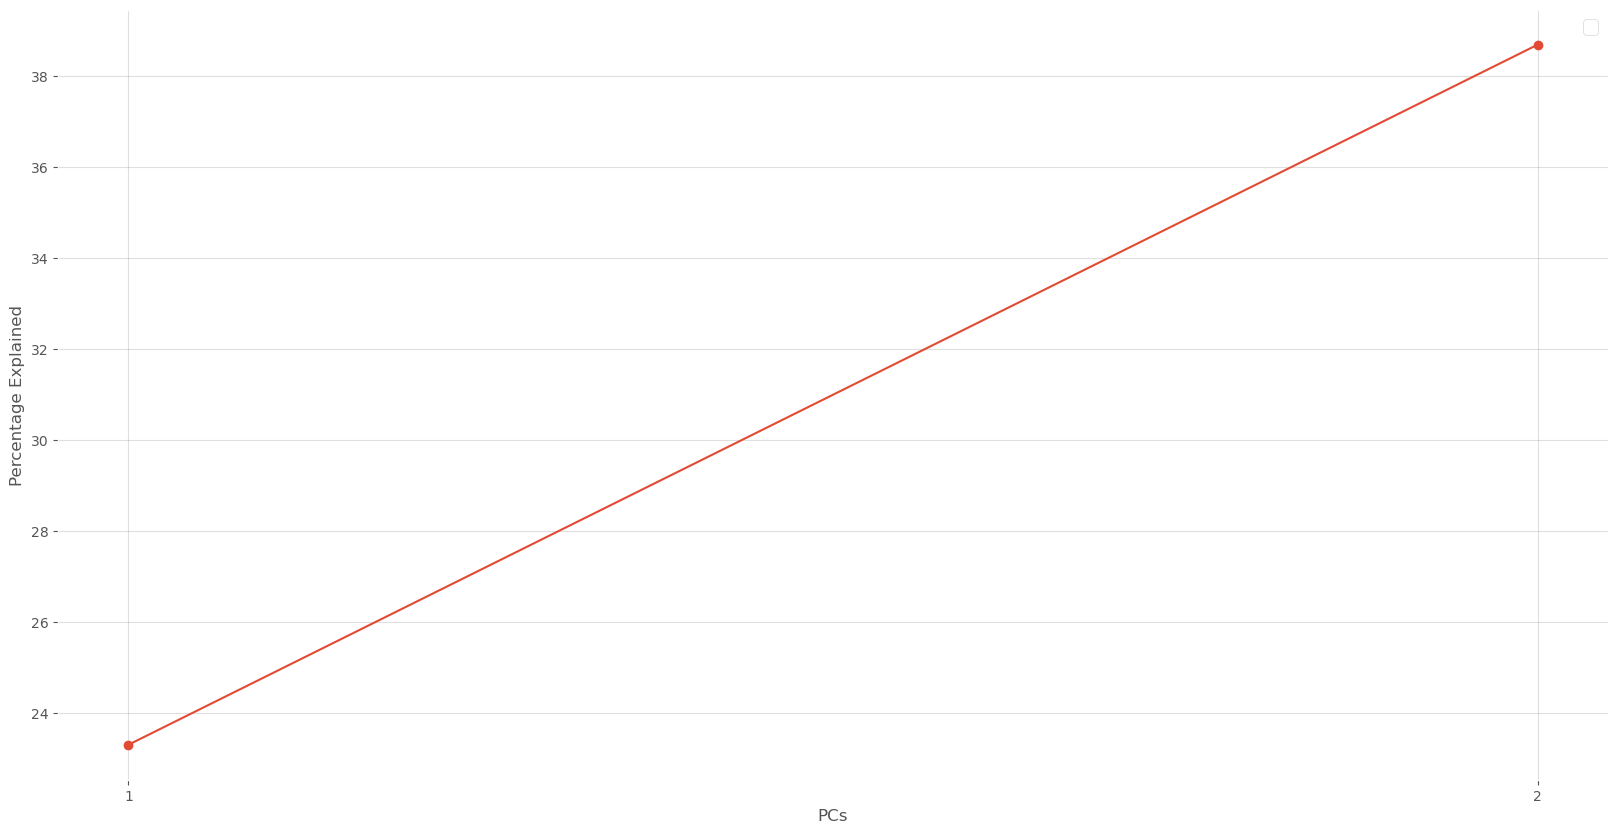

In [74]:
ncomps = 2

svd = TruncatedSVD(n_components=ncomps)

svd_fit2 = svd.fit(rescaledDataset2)

plt_data2 = pd.DataFrame(svd_fit2.explained_variance_ratio_.cumsum()*100)

plt_data2.index = np.arange(1, len(plt_data) + 1)

Y_pred2 = svd.fit_transform(rescaledDataset2)

ax = plt_data2.plot(kind="line", figsize=(20, 10), style = "o-"
                  )
ax.xaxis.set_major_locator(MaxNLocator(integer = True)
                          )

ax.set_xlabel("PCs")
ax.set_ylabel("Percentage Explained")
ax.legend("")

print("Variance preserved by first 5 components == {:.2%}".format(svd_fit2.explained_variance_ratio_.cumsum()[-1]
                                                                 )
     )

In [75]:
dfsvd2 = pd.DataFrame(Y_pred2, columns=["pc{}".format(c) for c in range(ncomps)], 
                     index = rescaledDataset2.index)
print(dfsvd2.shape)
dfsvd2.tail()

(248, 2)


,pc0,pc1
2023-11-20,0.957324,1.278531
2023-11-28,-0.332543,0.722502
2023-12-05,0.116333,1.024792
2023-12-12,0.787862,1.076799
2023-12-19,1.595406,1.506345


In [76]:
X_test = dfsvd2

# FIT MODELS

In [78]:
models = []

In [79]:
models.append(("LR", LinearRegression()
             )
            )

models.append(("LASSO", Lasso()
             )
            )

models.append(("EN", ElasticNet()
             )
            )

models.append(("CART", DecisionTreeRegressor()
             )
            )

models.append(("KNN", KNeighborsRegressor()
             )
            )

models.append(("SVR", SVR()
             )
            )
# Bagging (Boostrap Aggregation)

models.append(("RFR", RandomForestRegressor()
              )
             )

models.append(("ETR", ExtraTreesRegressor()
              )
             )

# Boosting

models.append(("GBR", GradientBoostingRegressor()
              )
             )

models.append(("ABR", AdaBoostRegressor()
              )
             )

In [80]:
models

[('LR', LinearRegression()),
 ('LASSO', Lasso()),
 ('EN', ElasticNet()),
 ('CART', DecisionTreeRegressor()),
 ('KNN', KNeighborsRegressor()),
 ('SVR', SVR()),
 ('RFR', RandomForestRegressor()),
 ('ETR', ExtraTreesRegressor()),
 ('GBR', GradientBoostingRegressor()),
 ('ABR', AdaBoostRegressor())]

In [81]:
num_folds = 10 
seed = 241001
scoring = "neg_mean_squared_error"

In [82]:
names = []
kfold_results = []
train_results = []
test_results = []

## LinearRegression()

In [84]:
X.isna().sum().sum()

0

In [85]:
name = 'LinearRegression()'
model = LinearRegression()
kfold = KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        
names.append(name)
cv_results = -1 * cross_val_score(model, 
                                  X_train, 
                                  Y_train,
                                  cv = kfold,
                                  scoring = scoring)
           
    
kfold_results.append(cv_results)
  
res_LN = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

train_result = mean_squared_error(res_LN.predict(X_train), Y_train)
    
train_results.append(train_result)
    
test_result = mean_squared_error(res_LN.predict(X_test), Y_test)
    
test_results.append(test_result)

# message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
#                                      cv_results.std(), 
#                                      train_result, 
#                                      test_result)
print(name)
print('Mean Cross Validation Score: ', cv_results.mean())
print('Std Cross Validation Score: ', cv_results.std())
print('Train MSE: train_result: ', train_result)
print('Test MSE: test_result: ', test_result)

LinearRegression()
Mean Cross Validation Score:  0.0001613550033308215
Std Cross Validation Score:  3.664393634643771e-05
Train MSE: train_result:  0.0001597300448619828
Test MSE: test_result:  0.00018609831718654143


## Lasso()

In [87]:
name = 'Lasso()'
model = Lasso()
kfold = KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        
names.append(name)
cv_results = -1 * cross_val_score(model, 
                                  X_train, 
                                  Y_train,
                                  cv = kfold,
                                  scoring = scoring)
           
    
kfold_results.append(cv_results)
  
res_LS = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

train_result = mean_squared_error(res_LS.predict(X_train), Y_train)
    
train_results.append(train_result)
    
test_result = mean_squared_error(res_LS.predict(X_test), Y_test)
    
test_results.append(test_result)

# message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
#                                      cv_results.std(), 
#                                      train_result, 
#                                      test_result)
print(name)
print('Mean Cross Validation Score: ', cv_results.mean())
print('Std Cross Validation Score: ', cv_results.std())
print('Train MSE: train_result: ', train_result)
print('Test MSE: test_result: ', test_result)

Lasso()
Mean Cross Validation Score:  0.0002528692832816727
Std Cross Validation Score:  5.376872777142366e-05
Train MSE: train_result:  0.00025224669586960545
Test MSE: test_result:  0.0003031657379450808


## ElasticNet()

In [89]:
name = 'ElasticNet()'
model = ElasticNet()
kfold = KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        
names.append(name)
cv_results = -1 * cross_val_score(model, 
                                  X_train, 
                                  Y_train,
                                  cv = kfold,
                                  scoring = scoring)
           
    
kfold_results.append(cv_results)
  
res_EN = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

train_result = mean_squared_error(res_EN.predict(X_train), Y_train)
    
train_results.append(train_result)
    
test_result = mean_squared_error(res_EN.predict(X_test), Y_test)
    
test_results.append(test_result)

# message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
#                                      cv_results.std(), 
#                                      train_result, 
#                                      test_result)
print(name)
print('Mean Cross Validation Score: ', cv_results.mean())
print('Std Cross Validation Score: ', cv_results.std())
print('Train MSE: train_result: ', train_result)
print('Test MSE: test_result: ', test_result)

ElasticNet()
Mean Cross Validation Score:  0.0002528692832816727
Std Cross Validation Score:  5.376872777142366e-05
Train MSE: train_result:  0.00025224669586960545
Test MSE: test_result:  0.0003031657379450808


## DecisionTreeRegressor()

In [91]:
name = 'DecisionTreeRegressor()'
model = DecisionTreeRegressor()
kfold = KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        
names.append(name)
cv_results = -1 * cross_val_score(model, 
                                  X_train, 
                                  Y_train,
                                  cv = kfold,
                                  scoring = scoring)
           
    
kfold_results.append(cv_results)
  
res_DTR = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

train_result = mean_squared_error(res_DTR.predict(X_train), Y_train)
    
train_results.append(train_result)
    
test_result = mean_squared_error(res_DTR.predict(X_test), Y_test)
    
test_results.append(test_result)

# message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
#                                      cv_results.std(), 
#                                      train_result, 
#                                      test_result)
print(name)
print('Mean Cross Validation Score: ', cv_results.mean())
print('Std Cross Validation Score: ', cv_results.std())
print('Train MSE: train_result: ', train_result)
print('Test MSE: test_result: ', test_result)

DecisionTreeRegressor()
Mean Cross Validation Score:  0.0003080281923199047
Std Cross Validation Score:  5.1701593654335704e-05
Train MSE: train_result:  0.0
Test MSE: test_result:  0.0002855930486706268


## KNeighborsRegressor()

In [93]:
name = 'KNeighborsRegressor()'
model = KNeighborsRegressor()
kfold = KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        
names.append(name)
cv_results = -1 * cross_val_score(model, 
                                  X_train, 
                                  Y_train,
                                  cv = kfold,
                                  scoring = scoring)
           
   
kfold_results.append(cv_results)
  
res_KNR = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

train_result = mean_squared_error(res_KNR.predict(X_train), Y_train)
    
train_results.append(train_result)
    
test_result = mean_squared_error(res_KNR.predict(X_test), Y_test)
    
test_results.append(test_result)

# message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
#                                      cv_results.std(), 
#                                      train_result, 
#                                      test_result)
print(name)
print('Mean Cross Validation Score: ', cv_results.mean())
print('Std Cross Validation Score: ', cv_results.std())
print('Train MSE: train_result: ', train_result)
print('Test MSE: test_result: ', test_result)

KNeighborsRegressor()
Mean Cross Validation Score:  0.00019956828777508584
Std Cross Validation Score:  5.4069624728757834e-05
Train MSE: train_result:  0.00013586752505213373
Test MSE: test_result:  0.00023389469088507797


## SVR()

In [95]:
name = 'SVR()'
model = SVR()
kfold = KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        
names.append(name)
cv_results = -1 * cross_val_score(model, 
                                  X_train, 
                                  Y_train,
                                  cv = kfold,
                                  scoring = scoring)
           
    
kfold_results.append(cv_results)
  
res_SVR = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

train_result = mean_squared_error(res_SVR.predict(X_train), Y_train)
    
train_results.append(train_result)
    
test_result = mean_squared_error(res_SVR.predict(X_test), Y_test)
    
test_results.append(test_result)

# message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
#                                      cv_results.std(), 
#                                      train_result, 
#                                      test_result)
print(name)
print('Mean Cross Validation Score: ', cv_results.mean())
print('Std Cross Validation Score: ', cv_results.std())
print('Train MSE: train_result: ', train_result)
print('Test MSE: test_result: ', test_result)

SVR()
Mean Cross Validation Score:  0.0003791024168642398
Std Cross Validation Score:  0.0001227262066483154
Train MSE: train_result:  0.00035082931246791036
Test MSE: test_result:  0.00040149679381310715


## RandomForestRegressor()

In [97]:
name = 'RandomForestRegressor()'
model = RandomForestRegressor()
kfold = KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        
names.append(name)
cv_results = -1 * cross_val_score(model, 
                                  X_train, 
                                  Y_train,
                                  cv = kfold,
                                  scoring = scoring)
           
    
kfold_results.append(cv_results)
  
res_RFR = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

train_result = mean_squared_error(res_RFR.predict(X_train), Y_train)
    
train_results.append(train_result)
    
test_result = mean_squared_error(res_RFR.predict(X_test), Y_test)
    
test_results.append(test_result)

# message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
#                                      cv_results.std(), 
#                                      train_result, 
#                                      test_result)
print(name)
print('Mean Cross Validation Score: ', cv_results.mean())
print('Std Cross Validation Score: ', cv_results.std())
print('Train MSE: train_result: ', train_result)
print('Test MSE: test_result: ', test_result)

RandomForestRegressor()
Mean Cross Validation Score:  0.00018955641746484054
Std Cross Validation Score:  5.059456259373246e-05
Train MSE: train_result:  2.7497389171235966e-05
Test MSE: test_result:  0.0002303566519791764


## ExtraTreesRegressor()

In [99]:
name = 'RandomForestRegressor()'
model = RandomForestRegressor()
kfold = KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        
names.append(name)
cv_results = -1 * cross_val_score(model, 
                                  X_train, 
                                  Y_train,
                                  cv = kfold,
                                  scoring = scoring)
           
    
kfold_results.append(cv_results)
  
res_ETR = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

train_result = mean_squared_error(res_ETR.predict(X_train), Y_train)
    
train_results.append(train_result)
    
test_result = mean_squared_error(res_ETR.predict(X_test), Y_test)
    
test_results.append(test_result)

# message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
#                                      cv_results.std(), 
#                                      train_result, 
#                                      test_result)
print(name)
print('Mean Cross Validation Score: ', cv_results.mean())
print('Std Cross Validation Score: ', cv_results.std())
print('Train MSE: train_result: ', train_result)
print('Test MSE: test_result: ', test_result)

RandomForestRegressor()
Mean Cross Validation Score:  0.00018859500917396858
Std Cross Validation Score:  4.6735574607021495e-05
Train MSE: train_result:  2.7573301783291836e-05
Test MSE: test_result:  0.0002350196969553491


## GradientBoostingRegressor()

In [101]:
name = 'RandomForestRegressor()'
model = RandomForestRegressor()
kfold = KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        
names.append(name)
cv_results = -1 * cross_val_score(model, 
                                  X_train, 
                                  Y_train,
                                  cv = kfold,
                                  scoring = scoring)
           
    
kfold_results.append(cv_results)
  
res_GBR = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

train_result = mean_squared_error(res_GBR.predict(X_train), Y_train)
    
train_results.append(train_result)
    
test_result = mean_squared_error(res_GBR.predict(X_test), Y_test)
    
test_results.append(test_result)

# message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
#                                      cv_results.std(), 
#                                      train_result, 
#                                      test_result)
print(name)
print('Mean Cross Validation Score: ', cv_results.mean())
print('Std Cross Validation Score: ', cv_results.std())
print('Train MSE: train_result: ', train_result)
print('Test MSE: test_result: ', test_result)

RandomForestRegressor()
Mean Cross Validation Score:  0.00018841154384956457
Std Cross Validation Score:  4.58605079374709e-05
Train MSE: train_result:  2.7767850072688013e-05
Test MSE: test_result:  0.00022720306450538675


## AdaBoostRegressor()

In [103]:
name = 'RandomForestRegressor()'
model = RandomForestRegressor()
kfold = KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        
names.append(name)
cv_results = -1 * cross_val_score(model, 
                                  X_train, 
                                  Y_train,
                                  cv = kfold,
                                  scoring = scoring)
           
    
kfold_results.append(cv_results)
  
res_ABR = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

train_result = mean_squared_error(res_ABR.predict(X_train), Y_train)
    
train_results.append(train_result)
    
test_result = mean_squared_error(res_ABR.predict(X_test), Y_test)
    
test_results.append(test_result)

# message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
#                                      cv_results.std(), 
#                                      train_result, 
#                                      test_result)
print(name)
print('Mean Cross Validation Score: ', cv_results.mean())
print('Std Cross Validation Score: ', cv_results.std())
print('Train MSE: train_result: ', train_result)
print('Test MSE: test_result: ', test_result)

RandomForestRegressor()
Mean Cross Validation Score:  0.00018752720156781322
Std Cross Validation Score:  4.8469695899273576e-05
Train MSE: train_result:  2.7222046446478087e-05
Test MSE: test_result:  0.00022431675838427716


## Loop through all to get the RMSE

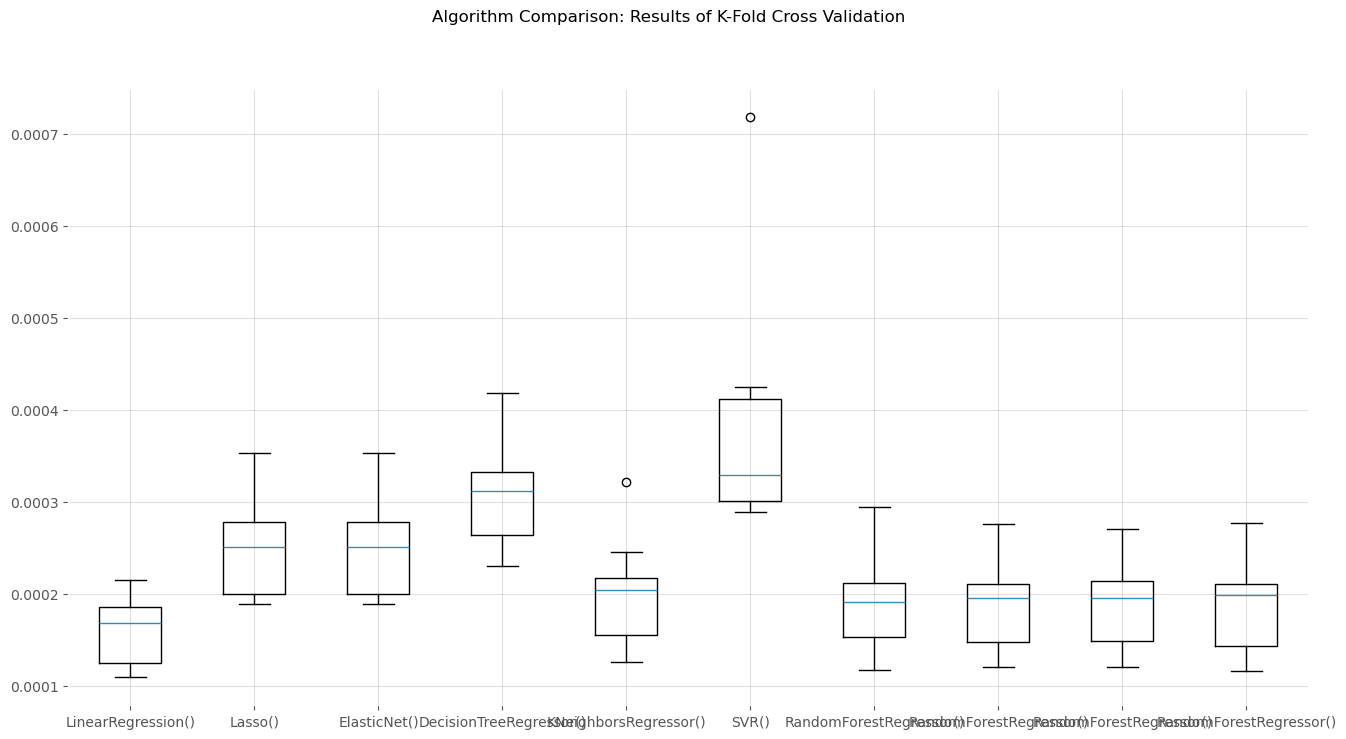

In [105]:
fig = plt.figure(figsize = [16, 8]
                )

fig.suptitle("Algorithm Comparison: Results of K-Fold Cross Validation")

ax = fig.add_subplot(111)

plt.boxplot(kfold_results)  #from TRAINING result - THAT'S WHY THERE ARE 10

ax.set_xticklabels(names)

plt.show()

# ARIMA

In [107]:
X2.columns

Index(['RUA_DT', 'RUA_3DT', 'RUA_6DT', 'RUA_12DT'], dtype='object')

In [108]:
X_train_ARIMA = X_train

X_test_ARIMA = X_test

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

In [109]:
X_train_ARIMA = X_train

X_test_ARIMA = X_test

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

In [110]:
modelARIMA =\
(    stats
     .ARIMA(endog = Y_train,
                exog = X_train_ARIMA,
                order = [1, 0, 0]
            )
)

model_fit = modelARIMA.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [111]:
error_training_ARIMA =\
(    mean_squared_error(Y_train,
                       model_fit.fittedvalues)
)

predicted =\
(
    model_fit
    .predict(start = train_len - 1,
             end = total_len - 1,
             exog = X_test_ARIMA)[1: ]
)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [112]:
error_testing_ARIMA =\
(    mean_squared_error(Y_test,
                        predicted)
)

error_testing_ARIMA

0.0001934357628686166

In [113]:
train_results = [x for x in train_results if x is not None]
train_results

[0.0001597300448619828,
 0.00025224669586960545,
 0.00025224669586960545,
 0.0,
 0.00013586752505213373,
 0.00035082931246791036,
 2.7497389171235966e-05,
 2.7573301783291836e-05,
 2.7767850072688013e-05,
 2.7222046446478087e-05]

In [114]:
test_results = [x for x in test_results if x is not None]
test_results

[0.00018609831718654143,
 0.0003031657379450808,
 0.0003031657379450808,
 0.0002855930486706268,
 0.00023389469088507797,
 0.00040149679381310715,
 0.0002303566519791764,
 0.0002350196969553491,
 0.00022720306450538675,
 0.00022431675838427716]

In [115]:
names

['LinearRegression()',
 'Lasso()',
 'ElasticNet()',
 'DecisionTreeRegressor()',
 'KNeighborsRegressor()',
 'SVR()',
 'RandomForestRegressor()',
 'RandomForestRegressor()',
 'RandomForestRegressor()',
 'RandomForestRegressor()']

In [116]:
test_results.append(error_testing_ARIMA)

train_results.append(error_training_ARIMA)

names.append("ARIMA")

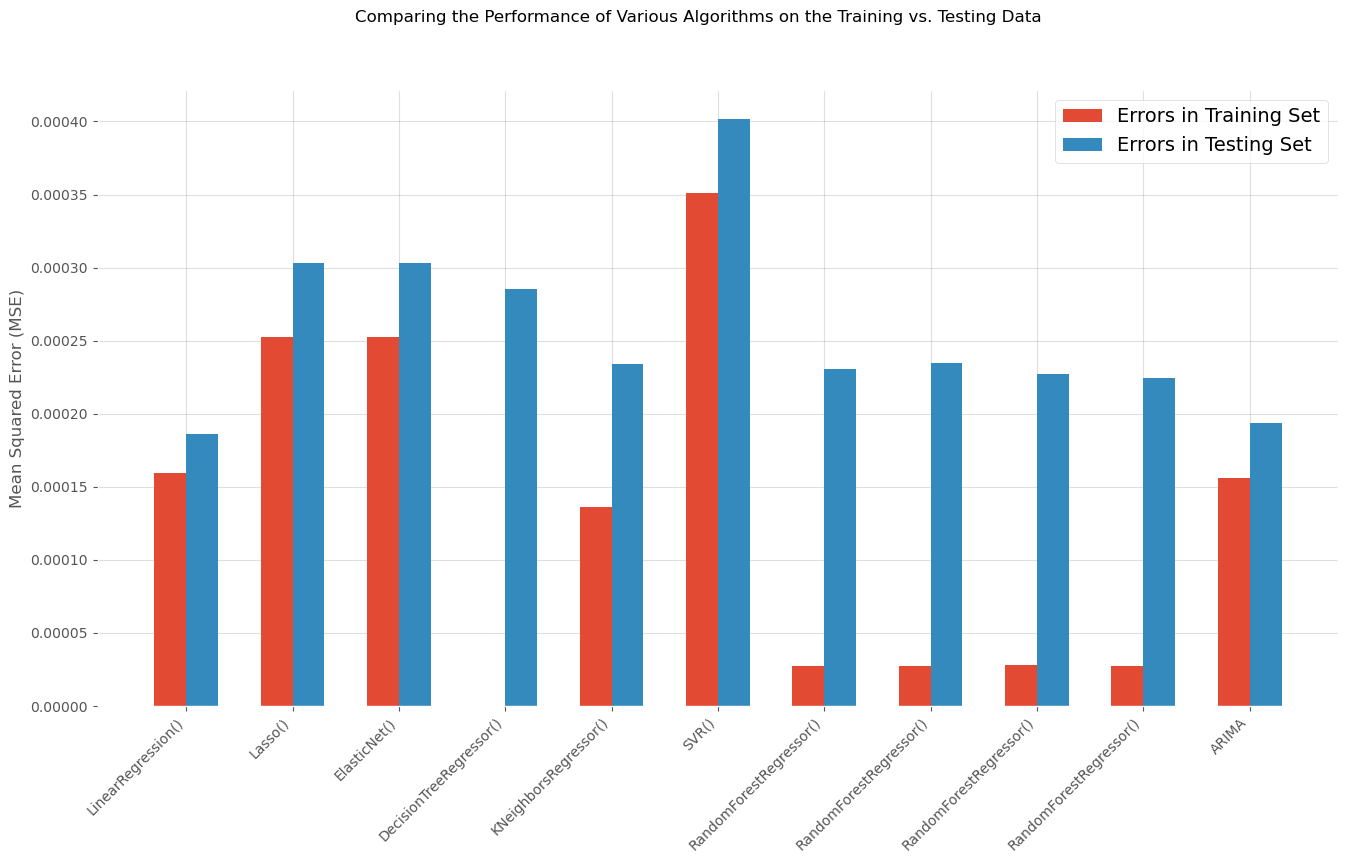

In [117]:
fig = plt.figure(figsize=[16, 8])

ind = np.arange(len(names))
width = 0.30

fig.suptitle("Comparing the Performance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

plt.bar(ind - width/2, train_results, width=width, label="Errors in Training Set")
plt.bar(ind + width/2, test_results, width=width, label="Errors in Testing Set")

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names, rotation=45, ha='right')  # Set rotation to 45 degrees

plt.ylabel("Mean Squared Error (MSE)")

plt.show()

# Overfitting happens when the error in test set > train set
# Underfitting happens when the error in train set > test set
# Best result is when the test set (blue bar) has the smallest error


In [118]:
# Hyperparameter Tuning; Grid Search for ARIMA

def assess_ARIMA_model(arima_order):
    
    modelARIMA = stats.ARIMA(endog = Y_train, 
                             exog = X_train_ARIMA,
                             order = arima_order)
    # Our model takes an arima_order as input, 
    # fits an ARIMA model to the training data Y_train 
    # with exogenous variables X_train_ARIMA, 
    
    model_fit = modelARIMA.fit()
    # and then calculates 

    error = mean_squared_error(Y_train,
                               model_fit.fittedvalues)
    
    # and returns the Mean Squared Error (MSE) 
    # between the true and the fitted values.

    return error

def assess_models(p_values, d_values, q_values):
    
    # Team, our function performs grid search 
    # over all combinations of provided p, d, and q values. 
    
    # For each combination, it calculates the MSE and prints it. 
    
    # If the MSE for the current combination 
    # is less than the best score encountered so far, 
    # it updates the best score and the corresponding configuration. 
    
    # At the end of the grid search, 
    # it prints the best configuration and its MSE.
    
    best_score, best_cfg = float("inf"), None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = assess_ARIMA_model(order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    
                    print("ARIMA%s MSE = %.7f" % (order, mse)
                          )
                    
                except:
                    continue
    print("Best ARIMA%s MSE = %.7f" % (best_cfg, best_score)
          )
    
# parameters to use for assessment

# Recall that the ARIMA model 
# is characterized by three parameters: 
# (p, d, q) which stand for the order of autoregression, 
# the degree of differencing, 
# and the order of the moving average, respectively.

p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)

In [119]:
assess_models(p_values, d_values, q_values)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

ARIMA(0, 0, 0) MSE = 0.0001597


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anacond

ARIMA(0, 0, 1) MSE = 0.0001359
ARIMA(0, 1, 0) MSE = 0.0003335
ARIMA(0, 1, 1) MSE = 0.0001610
ARIMA(1, 0, 0) MSE = 0.0001562


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

ARIMA(1, 0, 1) MSE = 0.0001371
ARIMA(1, 1, 0) MSE = 0.0002840


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1) MSE = 0.0001574
ARIMA(2, 0, 0) MSE = 0.0001423


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anacond

ARIMA(2, 0, 1) MSE = 0.0001405
ARIMA(2, 1, 0) MSE = 0.0002120
ARIMA(2, 1, 1) MSE = 0.0001441
Best ARIMA(0, 0, 1) MSE = 0.0001359


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [120]:
Y_train

1999-04-01   -0.000843
1999-04-09   -0.005301
1999-04-16    0.000544
1999-04-23   -0.004009
1999-04-30    0.014098
                ...   
2018-11-02   -0.004520
2018-11-09    0.012286
2018-11-16    0.013044
2018-11-26   -0.004263
2018-12-03   -0.011664
Name: RUA_pred, Length: 991, dtype: float64

In [121]:
ARIMA_Tuned =\
    stats \
    .ARIMA(endog = Y_train,
           exog = X_train_ARIMA,
          order = [0,0,1] # Team, input optimal set of hyperparameters here
          )

ARIMA_Fit_Tuned = ARIMA_Tuned.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [122]:
Predicted_Tuned =\
    model_fit \
    .predict(start = train_len - 1,
             end = total_len - 1,
             exog = X_test_ARIMA)[1:]

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [123]:
test_result_arima = print(mean_squared_error(Y_test,
                         Predicted_Tuned)
     )

train_result_arima = print(mean_squared_error(Y_train,
                         model_fit.fittedvalues))

0.0001934357628686166
0.00015621301360206304


In [124]:
names

['LinearRegression()',
 'Lasso()',
 'ElasticNet()',
 'DecisionTreeRegressor()',
 'KNeighborsRegressor()',
 'SVR()',
 'RandomForestRegressor()',
 'RandomForestRegressor()',
 'RandomForestRegressor()',
 'RandomForestRegressor()',
 'ARIMA']

In [125]:
train_results.append(train_result_arima)

In [126]:
test_results.append(test_result_arima)

In [127]:
names = []

In [128]:
for name, model in models:
    names.append(name)

In [129]:
names.append('ARIMA-X')

In [130]:
names

['LR',
 'LASSO',
 'EN',
 'CART',
 'KNN',
 'SVR',
 'RFR',
 'ETR',
 'GBR',
 'ABR',
 'ARIMA-X']

In [131]:
 
train_results = [x for x in train_results if x is not None]
train_results

[0.0001597300448619828,
 0.00025224669586960545,
 0.00025224669586960545,
 0.0,
 0.00013586752505213373,
 0.00035082931246791036,
 2.7497389171235966e-05,
 2.7573301783291836e-05,
 2.7767850072688013e-05,
 2.7222046446478087e-05,
 0.00015621301360206304]

In [132]:
test_results = [x for x in test_results if x is not None]
test_results

[0.00018609831718654143,
 0.0003031657379450808,
 0.0003031657379450808,
 0.0002855930486706268,
 0.00023389469088507797,
 0.00040149679381310715,
 0.0002303566519791764,
 0.0002350196969553491,
 0.00022720306450538675,
 0.00022431675838427716,
 0.0001934357628686166]

In [133]:
result_list = [res_LN, res_LS, res_EN, res_DTR, res_KNR, res_SVR, res_RFR, res_ETR, res_GBR, res_ABR, Predicted_Tuned]

In [134]:
names.append('OLS')

In [135]:
model_OLS = sm.OLS(Y_train, X_train)
res_OLS = model_OLS.fit()
print(res_OLS.summary())

train_result = mean_squared_error(res_OLS.predict(X_train), Y_train)
    
train_results.append(train_result)
    
test_result = mean_squared_error(res_OLS.predict(X_test), Y_test)
    
test_results.append(test_result)

                                 OLS Regression Results                                
Dep. Variable:               RUA_pred   R-squared (uncentered):                   0.367
Model:                            OLS   Adj. R-squared (uncentered):              0.365
Method:                 Least Squares   F-statistic:                              286.4
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                    7.45e-99
Time:                        22:50:37   Log-Likelihood:                          2925.5
No. Observations:                 991   AIC:                                     -5847.
Df Residuals:                     989   BIC:                                     -5837.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [136]:
df_result = pd.DataFrame()

df_result['models'] = names
df_result['train_MSE'] = train_results
df_result['test_MSE'] = test_results
# df_result['result_list'] = result_list

df_result.sort_values(by='test_MSE')

,models,train_MSE,test_MSE
11,OLS,0.000160,0.000186
0,LR,0.000160,0.000186
10,ARIMA-X,0.000156,0.000193
9,ABR,0.000027,0.000224
8,GBR,0.000028,0.000227
6,RFR,0.000027,0.000230
4,KNN,0.000136,0.000234
7,ETR,0.000028,0.000235
3,CART,0.000000,0.000286
1,LASSO,0.000252,0.000303


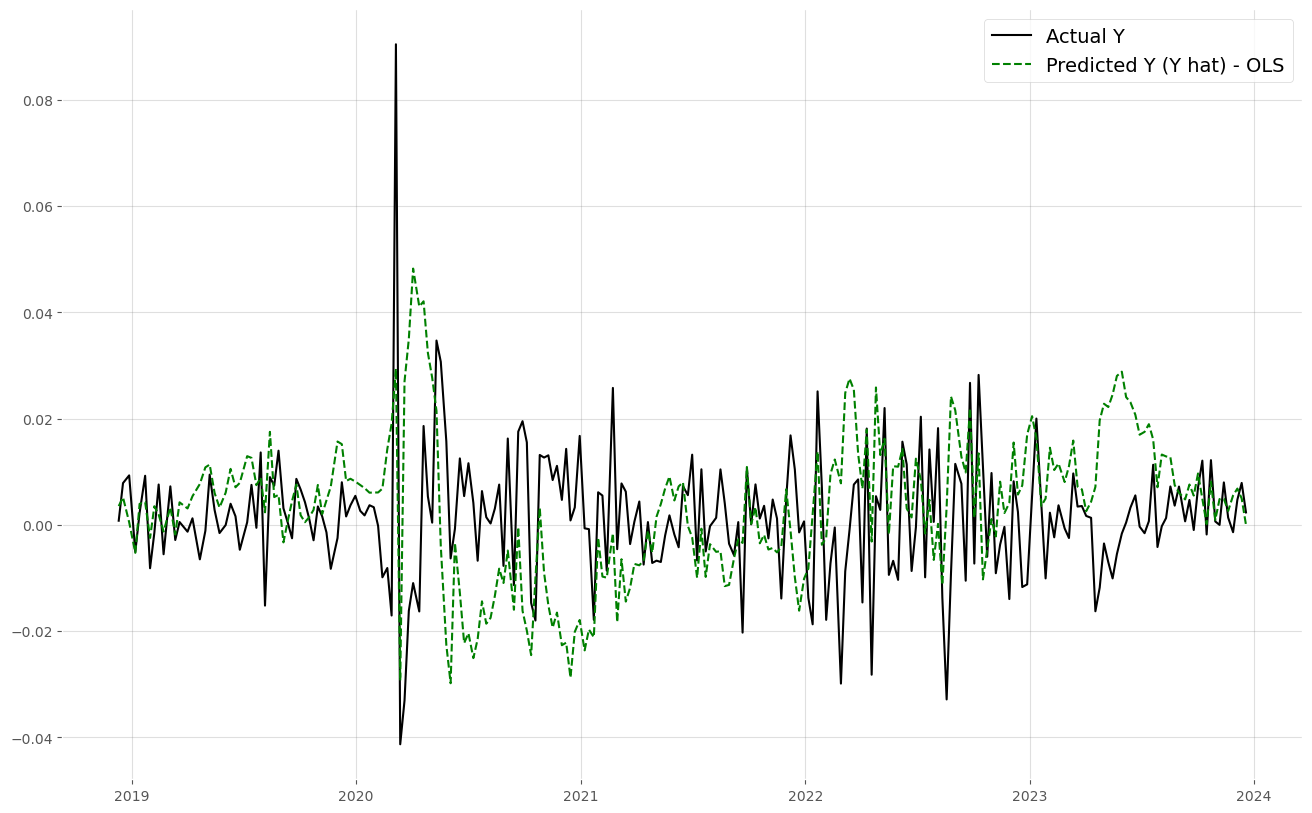

In [137]:
plt.figure(figsize = (16, 10)
           )

Predicted_Tuned.index = Y_test.index

plt.plot(np.exp(Y_test).cumprod() - 1, "black", label = "Actual Y")

# plt.plot(np.exp(Predicted_Tuned).cumprod(), "r--", label = "Predicted Y (Y hat) - ARIMA-X")

# plt.plot(Y_test.index, np.exp(res_EN.predict(X_test)).cumprod(), "orange", label = "Predicted Y (Y hat) - Elastic Net")

# plt.plot(Y_test.index, np.exp(res_LN.predict(X_test)).cumprod(), 'b--',  label = "Predicted Y (Y hat) - Linear Regression")

# plt.plot(Y_test.index, np.exp(res_LS.predict(X_test)).cumprod(), label = "Predicted Y (Y hat) - Lasso")

# plt.plot(Y_test.index, np.exp(res_DTR.predict(X_test)).cumprod(), label = "Predicted Y (Y hat) - Decision Tree Regression")

# plt.plot(Y_test.index, np.exp(res_KNR.predict(X_test)).cumprod(), label = "Predicted Y (Y hat) - KNeighborsRegressor")

# plt.plot(Y_test.index, np.exp(res_SVR.predict(X_test)).cumprod(), label = "Predicted Y (Y hat) - SVR")

# plt.plot(Y_test.index, np.exp(res_RFR.predict(X_test)).cumprod(), label = "Predicted Y (Y hat) - Random Forest Regressor")

# plt.plot(Y_test.index, np.exp(res_ETR.predict(X_test)).cumprod(), label = "Predicted Y (Y hat) - Extra Trees Regressor")

# plt.plot(Y_test.index, np.exp(res_GBR.predict(X_test)).cumprod(), label = "Predicted Y (Y hat) - Gradient Boosting Regressor")

# plt.plot(Y_test.index, np.exp(res_ABR.predict(X_test)).cumprod(), label = "Predicted Y (Y hat) - Ada Boost Regressor")

plt.plot(Y_test.index, np.exp(res_OLS.predict(X_test)).cumprod() -1, 'g--', label = "Predicted Y (Y hat) - OLS")

plt.legend()

plt.show()

## QUESTION: WHY NEED TO REMOVE DUMMY VARIABLE TO MAKE THE PREDICTION BETTER FOR THIS PCA MODEL?

## ONLY SELECT 2 PCs BECAUSE IF 3 PCs THERE IS ALWAYS 1 INSIGNIFICANT

## WHY IT CAN'T PREDICT THE COVID DIP

Let's analyze the output of your regression results:

### Coefficients Overview
- **pc0**: Coefficient is -0.0047, highly significant (p < 0.001).
- **pc1**: Coefficient is 0.0020, also highly significant (p < 0.001).
- **pc2**: Coefficient is 0.0004, not significant (p = 0.314).
- **pc3**: Coefficient is -0.0012, significant (p = 0.003).
- **pc4**: Coefficient is 0.0024, highly significant (p < 0.001).
- **pc5**: Coefficient is -0.0020, highly significant (p < 0.001).
- **pc6**: Coefficient is 0.0012, significant (p = 0.013).
- **pc7**: Coefficient is 8.407e-05, not significant (p = 0.876).
- **pc8**: Coefficient is -0.0023, highly significant (p < 0.001).
- **pc9**: Coefficient is 0.0007, not significant (p = 0.325).

### Key Points
1. **Significant Predictors**: 
   - **pc0, pc1, pc3, pc4, pc5, pc6, and pc8** have p-values < 0.05, indicating they are statistically significant predictors of the dependent variable.
   - **pc2, pc7, and pc9** are not significant, suggesting they do not have a meaningful effect on the outcome.

2. **Direction of Effects**:
   - Positive coefficients (pc1, pc4, pc6) indicate that as these predictors increase, the dependent variable is expected to increase.
   - Negative coefficients (pc0, pc3, pc5, pc8) indicate that as these predictors increase, the dependent variable is expected to decrease.

### Model Diagnostics
- **Omnibus Test**: The Omnibus statistic (99.370) with a p-value of 0.000 suggests that the residuals are not normally distributed.
- **Durbin-Watson Statistic**: A value of 2.234 suggests no significant autocorrelation in the residuals (values close to 2 are acceptable).
- **Jarque-Bera Test**: The JB statistic (435.662) with a very low p-value indicates non-normality of residuals, reinforcing the results of the Omnibus test.
- **Skewness**: A skew of -0.360 indicates a slight leftward skew in the residuals.
- **Kurtosis**: A value of 6.167 suggests a leptokurtic distribution, indicating a higher likelihood of outliers compared to a normal distribution.
- **Condition Number**: A condition number of 3.51 indicates that multicollinearity is likely not an issue, as it’s below the common threshold (often 30 or higher).

### Summary
The analysis shows that several principal components are statistically significant predictors of the dependent variable, with specific coefficients suggesting the direction of their effects. However, the model's residuals show signs of non-normality, which could be addressed through transformations or alternative modeling approaches. Overall, the model seems to capture some significant relationships while exhibiting some issues with residual distribution.

LASSO, ARIMAX, Elastic Net, and OLS are different statistical and machine learning methods used for prediction, each with unique characteristics suited to various data types and scenarios. Here's a breakdown of their differences and use cases:

1. LASSO (Least Absolute Shrinkage and Selection Operator)
Purpose: Regression technique with feature selection and regularization.
Approach: LASSO is a type of linear regression that adds an L1 penalty term to the loss function, which penalizes the absolute values of the coefficients.
Key Benefit: The L1 penalty causes some coefficients to shrink to zero, effectively removing irrelevant features and helping with high-dimensional datasets where feature selection is important.
Use Case: It is commonly used when you have many predictors and suspect that only a few have significant effects on the response.
2. ARIMAX (Autoregressive Integrated Moving Average with Exogenous Variables)
Purpose: Time series forecasting model that accounts for external (exogenous) variables.
Approach: ARIMAX extends the ARIMA model by including one or more external predictors that may affect the target series. It combines autoregressive (AR), differencing (I), and moving average (MA) terms for modeling the target variable along with the effect of external variables.
Key Benefit: ARIMAX is particularly useful for time series data where external factors (like seasonality, economic indicators, etc.) impact the target series.
Use Case: Ideal for time series forecasting where you want to incorporate additional known predictors, such as weather, economic data, or other relevant covariates.
3. Elastic Net
Purpose: Regression method that balances between LASSO (L1) and Ridge (L2) regularization.
Approach: Elastic Net uses a linear combination of L1 and L2 penalties, which helps to handle multicollinearity and select groups of correlated features together.
Key Benefit: This model retains the feature selection ability of LASSO but includes the stability of Ridge regression when predictors are highly correlated.
Use Case: Commonly used when dealing with datasets with highly correlated features, especially in predictive modeling where both regularization and feature selection are important.
4. OLS (Ordinary Least Squares)
Purpose: Basic regression method that finds the best-fit line by minimizing the sum of squared residuals.
Approach: OLS regression estimates the coefficients by minimizing the sum of squared differences between the observed values and the predicted values.
Key Benefit: Simple and interpretable model without regularization; every predictor gets a coefficient if there is any relationship with the outcome.
Use Case: Often used as a benchmark model for regression tasks or in scenarios where simplicity and interpretability are prioritized over regularization or feature selection.
Summary of Differences
Regularization: LASSO and Elastic Net include regularization (with feature selection), while OLS does not. ARIMAX focuses on time series and doesn't regularize in the same way.
Feature Selection: LASSO and Elastic Net perform feature selection, with Elastic Net handling correlated features better. OLS includes all features.
Type of Data: ARIMAX is best for time series data, while the others are typically used for cross-sectional or panel data.
Use Cases:
LASSO: High-dimensional data, feature selection.
ARIMAX: Time series with external predictors.
Elastic Net: High-dimensional data with multicollinearity.
OLS: Basic regression tasks where interpretability is needed.

In [141]:
X_train

,pc0,pc1
1999-04-01,-0.896420,1.231798
1999-04-09,1.831770,1.304607
1999-04-16,-0.980017,1.549396
1999-04-23,1.022974,1.621463
1999-04-30,-1.145063,0.681505
...,...,...
2018-11-02,-0.327012,-1.252615
2018-11-09,-1.399676,-0.049346
2018-11-16,0.980493,-1.793493
2018-11-26,0.748500,-2.216008
